<a href="https://colab.research.google.com/github/ekselan/DS-Unit-2-Kaggle-Challenge/blob/master/module1-decision-trees/2_2_1_A_Copy_of_LS_DS_221_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 2, Module 1*

---

# Decision Trees

## Assignment
- [ ] [Sign up for a Kaggle account](https://www.kaggle.com/), if you don’t already have one. Go to our Kaggle InClass competition website. You will be given the URL in Slack. Go to the Rules page. Accept the rules of the competition. Notice that the Rules page also has instructions for the Submission process. The Data page has feature definitions.
- [ ] Do train/validate/test split with the Tanzania Waterpumps data.
- [ ] Begin with baselines for classification.
- [ ] Select features. Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.
- [ ] Get your validation accuracy score.
- [ ] Get and plot your feature importances.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

### Reading

- A Visual Introduction to Machine Learning
  - [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
  - [Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU) — _Don’t worry about understanding the code, just get introduced to the concepts. This 10 minute video has excellent diagrams and explanations._
- [Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)


### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features. (For example, [what columns have zeros and shouldn't?](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values) What columns are duplicates, or nearly duplicates? Can you extract the year from date_recorded? Can you engineer new features, such as the number of years from waterpump construction to waterpump inspection?)
- [ ] Try other [scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html).
- [ ] Make exploratory visualizations and share on Slack.


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this classification problem, you may want to use the parameter `logistic=True`, but it can be slow.

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from a previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```


In [1]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

     |████████████████████████████████| 102kB 2.3MB/s 
     |████████████████████████████████| 245kB 2.8MB/s 
     |████████████████████████████████| 61kB 6.5MB/s 
     |████████████████████████████████| 1.5MB 8.4MB/s 
     |████████████████████████████████| 8.7MB 18.1MB/s 
     |████████████████████████████████| 614kB 47.2MB/s 
     |████████████████████████████████| 61kB 7.1MB/s 
     |████████████████████████████████| 61kB 8.3MB/s 
     |████████████████████████████████| 256kB 36.0MB/s 
     |████████████████████████████████| 296kB 51.2MB/s 
     |████████████████████████████████| 307kB 47.9MB/s 
     |████████████████████████████████| 51kB 6.9MB/s 
     |████████████████████████████████| 215kB 47.9MB/s 
     |████████████████████████████████| 61kB 6.2MB/s 
     |████████████████████████████████| 747kB 47.4MB/s 
  Created wheel for confuse: filename=confuse-1.1.0-cp36-none-any.whl size=17574 sha256=e2948ce57f0b3be6bfd1622360fe61ac9e8a1418d5151ab46ac1ec2a13010c74
  Stored in director

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [120]:
# Check Pandas Profiling version
import pandas_profiling
pandas_profiling.__version__

'2.5.0'

In [4]:
# Old code for Pandas Profiling version 2.3
# It can be very slow with medium & large datasets.
# These parameters will make it faster.

# profile = train.profile_report(
#     check_correlation_pearson=False,
#     correlations={
#         'pearson': False,
#         'spearman': False,
#         'kendall': False,
#         'phi_k': False,
#         'cramers': False,
#         'recoded': False,
#     },
#     plot={'histogram': {'bayesian_blocks_bins': False}},
# )
#

# New code for Pandas Profiling version 2.4
from pandas_profiling import ProfileReport
profile = ProfileReport(train, minimal=True).to_notebook_iframe()

profile

In [6]:
train.head(3)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional


In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import plotly.express as px

#Do train/validate/test split with the Tanzania Waterpumps data.
 

In [36]:
# Already have test, so split train into train and val sets

from sklearn.model_selection import train_test_split
target = 'status_group'

# Set test size to 20% of data, specify random state for reproducability, 
# stratify to ensure same distribution of target values in train and val sets
train, val = train_test_split(train, test_size=0.20, random_state=25, 
                              stratify=train[target])

print(train.shape)
print(val.shape)
print(test.shape)

(47520, 41)
(11880, 41)
(14358, 40)


#Begin with baselines for classification.
 

In [10]:
train[target].value_counts(normalize=True)

# Baseline will be 54%  (functional water pump)

functional                 0.543077
non functional             0.384238
functional needs repair    0.072685
Name: status_group, dtype: float64

In [18]:
y_train = train[target]
majority_class = y_train.mode()[0]
base_pred = [majority_class] * len(y_train)
print(f'Baseline score: {accuracy_score(y_train, base_pred):%}')

Baseline score: 54.307660%


#Select features. 
 

In [24]:
train.describe(exclude='number') 

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
count,47520,44600,44589,47520,47520,47213,47520,47520,47520,44867,47520,44430,24952,45068,47520,47520,47520,47520,47520,47520,47520,47520,47520,47520,47520,47520,47520,47520,47520,47520,47520
unique,349,1673,1912,30738,9,17251,21,125,2083,2,1,12,2536,2,18,13,7,12,5,7,7,8,6,5,5,10,7,3,7,6,3
top,2011-03-15,Government Of Tanzania,DWE,none,Lake Victoria,Shuleni,Iringa,Njombe,Igosi,True,GeoData Consultants Ltd,VWC,K,True,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
freq,462,7289,13901,2840,8206,410,4238,2010,245,40802,47520,29459,566,31005,21417,21417,21417,32426,41962,20331,20331,40692,40692,26488,26488,13621,13621,36649,22775,27665,25807


In [25]:
# Select features

high_cardinal = ['date_recorded','funder','installer','wpt_name',
                 'subvillage','lga','ward','scheme_name',]
# Define features by removing target and high cardinal variables                 
features = train.columns.drop([target] + high_cardinal)
features

Index(['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude',
       'num_private', 'basin', 'region', 'region_code', 'district_code',
       'population', 'public_meeting', 'recorded_by', 'scheme_management',
       'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [0]:
# The alternate (probably better) way to perform the above

# train_features = train.drop(columns=[target, 'id'])
# numeric_features = train_features.select_dtypes(include='number').columns.tolist()
# cardinality = train_features.select_dtypes(exclude='number').nunique()
# categorical_features = cardinality[cardinality <= 50].index.tolist()
# features = numeric_features + categorical_features

In [38]:
# Specify x feature matrices and y target vectors (no y for test data due to not
# being present in the dataset)

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape

((47520, 32), (47520,), (11880, 32), (11880,), (14358, 32))

#Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.

In [0]:
# Define pipeline
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='median'),
    DecisionTreeClassifier(random_state=25, min_samples_leaf=11, max_depth=18)
)

In [99]:
# Apply pipeline
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['basin', 'region', 'public_meeting',
                                     'recorded_by', 'scheme_management',
                                     'permit', 'extraction_type',
                                     'extraction_type_group',
                                     'extraction_type_class', 'management',
                                     'management_group', 'payment',
                                     'payment_type', 'water_quality',
                                     'quality_group', 'quantity',
                                     'quantity_group', 'source', 'source_type',
                                     's...
                               verbose=0)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=18,
                                 

#Get your validation accuracy score.
 

In [100]:
print(f'Train Accuracy: {pipeline.score(X_train, y_train):%}')
print(f'Validation Accuracy: {pipeline.score(X_val, y_val):%}')

Train Accuracy: 81.662458%
Validation Accuracy: 76.809764%


#Get and plot your feature importances.
 

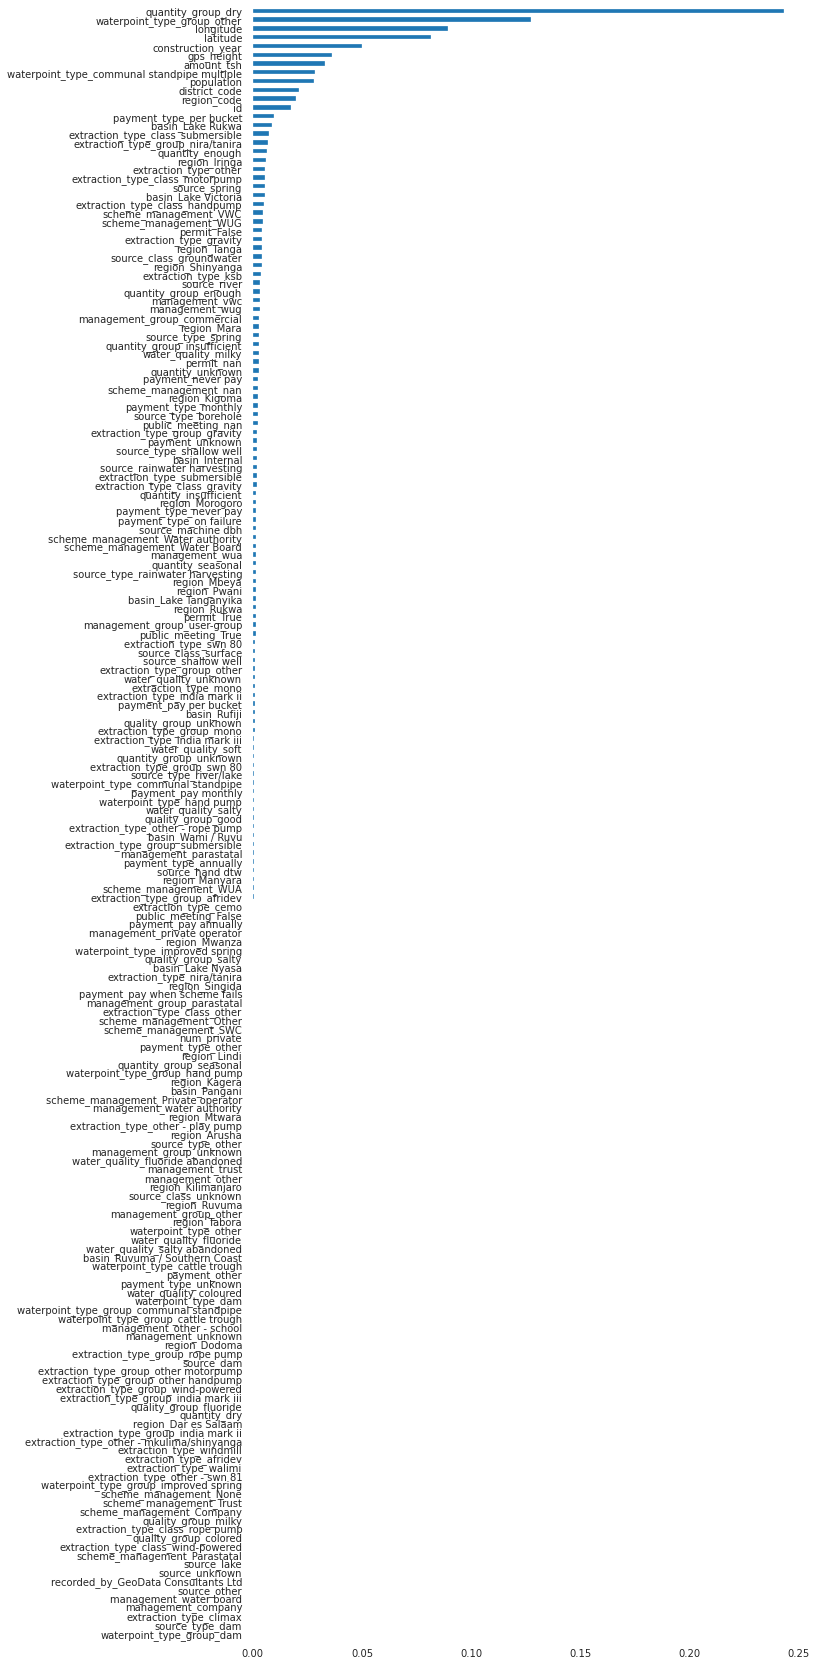

In [112]:
model = pipeline.named_steps['decisiontreeclassifier']
encoded = pipeline.named_steps['onehotencoder']
encoded_cols = encoded.transform(X_val).columns
importances = pd.Series(model.feature_importances_, encoded_cols)
plt.figure(figsize=(10,30))
importances.sort_values().plot.barh();

#Submit your predictions to our Kaggle competition

In [113]:
y_pred = pipeline.predict(X_test)
y_pred

array(['non functional', 'functional', 'functional', ..., 'functional',
       'functional', 'non functional'], dtype=object)

In [115]:
train.head(3)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
55878,34052,0.0,2013-02-04,Government Of Tanzania,1105,DWE,31.042482,-5.064764,Zahanati,0,Lake Tanganyika,Mganza Kati,Kigoma,16,3,Kigoma Rural,Mtego wa Noti,135,True,GeoData Consultants Ltd,VWC,NaN,True,1972,other,other,other,vwc,user-group,unknown,unknown,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,other,other,non functional
59378,38067,500.0,2011-03-21,Rc,2101,ACRA,34.620387,-9.358405,Michael Msigwa,0,Rufiji,Igelango,Iringa,11,4,Njombe,Imalinyi,36,True,GeoData Consultants Ltd,VWC,Tove mtwango,True,2008,gravity,gravity,gravity,wua,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
24064,60585,0.0,2012-10-16,Rwssp,0,DWE,33.521990,-3.876958,Mzee Pembengita,0,Internal,Itubula,Shinyanga,17,8,Kishapu,Itilima,0,False,GeoData Consultants Ltd,WUG,NaN,False,0,other,other,other,wug,user-group,unknown,unknown,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,other,other,non functional


In [116]:
submission = test[['id']].copy()
submission['status_group'] = y_pred
submission

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14353,39307,non functional
14354,18990,functional
14355,28749,functional
14356,33492,functional


In [0]:
submission.to_csv('tanzania_water_submission_april_13.csv', index=False)

# Can the score improve? Try some feature engineering

In [0]:
# num_private is almost all zeros and has no description, construction_year and 
# longitude have zeros but should not, and I would like a new feature that 
# looks at difference between construction year and year recorded

In [5]:
print(train.shape)
train.head()

(47520, 41)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
55878,34052,0.0,2013-02-04,Government Of Tanzania,1105,DWE,31.042482,-5.064764,Zahanati,0,Lake Tanganyika,Mganza Kati,Kigoma,16,3,Kigoma Rural,Mtego wa Noti,135,True,GeoData Consultants Ltd,VWC,NaN,True,1972,other,other,other,vwc,user-group,unknown,unknown,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,other,other,non functional
59378,38067,500.0,2011-03-21,Rc,2101,ACRA,34.620387,-9.358405,Michael Msigwa,0,Rufiji,Igelango,Iringa,11,4,Njombe,Imalinyi,36,True,GeoData Consultants Ltd,VWC,Tove mtwango,True,2008,gravity,gravity,gravity,wua,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
24064,60585,0.0,2012-10-16,Rwssp,0,DWE,33.521990,-3.876958,Mzee Pembengita,0,Internal,Itubula,Shinyanga,17,8,Kishapu,Itilima,0,False,GeoData Consultants Ltd,WUG,NaN,False,0,other,other,other,wug,user-group,unknown,unknown,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,other,other,non functional
42655,43927,0.0,2011-03-20,Islamic Found,-20,Is,38.881888,-6.455487,Maramoja,0,Wami / Ruvu,Magomeni B,Pwani,6,1,Bagamoyo,Magomeni,90,True,GeoData Consultants Ltd,WUG,NaN,False,2009,india mark ii,india mark ii,handpump,wug,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
28683,54397,0.0,2013-02-17,Danida,1034,DANIAD,35.725791,-10.498063,Kwa Beda Njogopa,0,Lake Nyasa,Ilala,Ruvuma,10,5,Namtumbo,Msindo,480,True,GeoData Consultants Ltd,WUG,NaN,False,1989,swn 80,swn 80,handpump,wug,user-group,pay when scheme fails,on failure,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [0]:
def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    
    # Prevent SettingWithCopyWarning
    X = X.copy()
    
    # About 3% of the time, latitude has small values near zero,
    # outside Tanzania, so we'll treat these values like zero.
    X['latitude'] = X['latitude'].replace(-2e-08, 0)
    
    # Replace the zeros with nulls - will impute later with pipeline
    cols_with_zeros = ['longitude', 'latitude','construction_year']
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)

    # quantity & quantity_group are duplicates, so drop one
    # also drop num_private which is almost entirely zero and has no description
    # payment, management, extraction_type, extraction_type_group, source and
    # waterpoint_type all seem redundant
    X = X.drop(columns=['quantity_group','num_private','payment','management',
                        'extraction_type','extraction_type_group','source',
                        'waterpoint_type'])
    
    # return the wrangled dataframe
    return X

train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

In [38]:
train.shape, val.shape, test.shape

((47520, 33), (11880, 33), (14358, 32))

In [17]:
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type_class,management_group,payment_type,water_quality,quality_group,quantity,source_type,source_class,waterpoint_type_group,status_group
55878,34052,0.0,2013-02-04,Government Of Tanzania,1105,DWE,31.042482,-5.064764,Zahanati,Lake Tanganyika,Mganza Kati,Kigoma,16,3,Kigoma Rural,Mtego wa Noti,135,True,GeoData Consultants Ltd,VWC,NaN,True,1972.0,other,user-group,unknown,soft,good,insufficient,shallow well,groundwater,other,non functional
59378,38067,500.0,2011-03-21,Rc,2101,ACRA,34.620387,-9.358405,Michael Msigwa,Rufiji,Igelango,Iringa,11,4,Njombe,Imalinyi,36,True,GeoData Consultants Ltd,VWC,Tove mtwango,True,2008.0,gravity,user-group,monthly,soft,good,enough,spring,groundwater,communal standpipe,functional
24064,60585,0.0,2012-10-16,Rwssp,0,DWE,33.521990,-3.876958,Mzee Pembengita,Internal,Itubula,Shinyanga,17,8,Kishapu,Itilima,0,False,GeoData Consultants Ltd,WUG,NaN,False,NaN,other,user-group,unknown,soft,good,insufficient,shallow well,groundwater,other,non functional
42655,43927,0.0,2011-03-20,Islamic Found,-20,Is,38.881888,-6.455487,Maramoja,Wami / Ruvu,Magomeni B,Pwani,6,1,Bagamoyo,Magomeni,90,True,GeoData Consultants Ltd,WUG,NaN,False,2009.0,handpump,user-group,never pay,soft,good,enough,shallow well,groundwater,hand pump,functional
28683,54397,0.0,2013-02-17,Danida,1034,DANIAD,35.725791,-10.498063,Kwa Beda Njogopa,Lake Nyasa,Ilala,Ruvuma,10,5,Namtumbo,Msindo,480,True,GeoData Consultants Ltd,WUG,NaN,False,1989.0,handpump,user-group,on failure,soft,good,enough,shallow well,groundwater,hand pump,functional


### Couldn't quite get this section working, skip for now

In [0]:
year = '2013-02-04'

In [22]:
a = year.split('-')[0]
a

'2013'

In [0]:
# To compare construction_year and and date_recorded, I'll need to change the
# latter to just the year

In [0]:
train['date_recorded'] = train['date_recorded'].astype(str)
val['date_recorded'] = val['date_recorded'].astype(str)
test['date_recorded'] = test['date_recorded'].astype(str)

In [0]:
def date_fix(X):
  col_to_fix = ['date_recorded']
  for col in col_to_fix:
    X[col] = X[col].str.strip('-')[0]
  return X

In [0]:
train = date_fix(train)
val = date_fix(val)
test = date_fix(test)

In [31]:
train['date_recorded'] = train['date_recorded'].str.split('-')
# val['date_recorded'] = val['date_recorded'].split('-')[0]
# test['date_recorded'] = test['date_recorded'].split('-')[0]
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type_class,management_group,payment_type,water_quality,quality_group,quantity,source_type,source_class,waterpoint_type_group,status_group
55878,34052,0.0,"[2011, 03, 14]",Government Of Tanzania,1105,DWE,31.042482,-5.064764,Zahanati,Lake Tanganyika,Mganza Kati,Kigoma,16,3,Kigoma Rural,Mtego wa Noti,135,True,GeoData Consultants Ltd,VWC,NaN,True,1972.0,other,user-group,unknown,soft,good,insufficient,shallow well,groundwater,other,non functional
59378,38067,500.0,"[2011, 03, 14]",Rc,2101,ACRA,34.620387,-9.358405,Michael Msigwa,Rufiji,Igelango,Iringa,11,4,Njombe,Imalinyi,36,True,GeoData Consultants Ltd,VWC,Tove mtwango,True,2008.0,gravity,user-group,monthly,soft,good,enough,spring,groundwater,communal standpipe,functional
24064,60585,0.0,"[2011, 03, 14]",Rwssp,0,DWE,33.521990,-3.876958,Mzee Pembengita,Internal,Itubula,Shinyanga,17,8,Kishapu,Itilima,0,False,GeoData Consultants Ltd,WUG,NaN,False,NaN,other,user-group,unknown,soft,good,insufficient,shallow well,groundwater,other,non functional
42655,43927,0.0,"[2011, 03, 14]",Islamic Found,-20,Is,38.881888,-6.455487,Maramoja,Wami / Ruvu,Magomeni B,Pwani,6,1,Bagamoyo,Magomeni,90,True,GeoData Consultants Ltd,WUG,NaN,False,2009.0,handpump,user-group,never pay,soft,good,enough,shallow well,groundwater,hand pump,functional
28683,54397,0.0,"[2011, 03, 14]",Danida,1034,DANIAD,35.725791,-10.498063,Kwa Beda Njogopa,Lake Nyasa,Ilala,Ruvuma,10,5,Namtumbo,Msindo,480,True,GeoData Consultants Ltd,WUG,NaN,False,1989.0,handpump,user-group,on failure,soft,good,enough,shallow well,groundwater,hand pump,functional


In [33]:
train['date_recorded'] = train['date_recorded'].str.rstrip(',')
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type_class,management_group,payment_type,water_quality,quality_group,quantity,source_type,source_class,waterpoint_type_group,status_group
55878,34052,0.0,NaN,Government Of Tanzania,1105,DWE,31.042482,-5.064764,Zahanati,Lake Tanganyika,Mganza Kati,Kigoma,16,3,Kigoma Rural,Mtego wa Noti,135,True,GeoData Consultants Ltd,VWC,NaN,True,1972.0,other,user-group,unknown,soft,good,insufficient,shallow well,groundwater,other,non functional
59378,38067,500.0,NaN,Rc,2101,ACRA,34.620387,-9.358405,Michael Msigwa,Rufiji,Igelango,Iringa,11,4,Njombe,Imalinyi,36,True,GeoData Consultants Ltd,VWC,Tove mtwango,True,2008.0,gravity,user-group,monthly,soft,good,enough,spring,groundwater,communal standpipe,functional
24064,60585,0.0,NaN,Rwssp,0,DWE,33.521990,-3.876958,Mzee Pembengita,Internal,Itubula,Shinyanga,17,8,Kishapu,Itilima,0,False,GeoData Consultants Ltd,WUG,NaN,False,NaN,other,user-group,unknown,soft,good,insufficient,shallow well,groundwater,other,non functional
42655,43927,0.0,NaN,Islamic Found,-20,Is,38.881888,-6.455487,Maramoja,Wami / Ruvu,Magomeni B,Pwani,6,1,Bagamoyo,Magomeni,90,True,GeoData Consultants Ltd,WUG,NaN,False,2009.0,handpump,user-group,never pay,soft,good,enough,shallow well,groundwater,hand pump,functional
28683,54397,0.0,NaN,Danida,1034,DANIAD,35.725791,-10.498063,Kwa Beda Njogopa,Lake Nyasa,Ilala,Ruvuma,10,5,Namtumbo,Msindo,480,True,GeoData Consultants Ltd,WUG,NaN,False,1989.0,handpump,user-group,on failure,soft,good,enough,shallow well,groundwater,hand pump,functional


### Let's see if this additional cleaning impacts results

In [39]:
# Select features

high_cardinal = ['date_recorded','funder','installer','wpt_name',
                 'subvillage','lga','ward','scheme_name',]
# Define features by removing target and high cardinal variables                 
features = train.columns.drop([target] + high_cardinal)
features

Index(['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude', 'basin',
       'region', 'region_code', 'district_code', 'population',
       'public_meeting', 'recorded_by', 'scheme_management', 'permit',
       'construction_year', 'extraction_type_class', 'management_group',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'source_type', 'source_class', 'waterpoint_type_group'],
      dtype='object')

In [40]:
# Specify x feature matrices and y target vectors (no y for test data due to not
# being present in the dataset)

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape

((47520, 24), (47520,), (11880, 24), (11880,), (14358, 24))

In [42]:
# Apply pipeline
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['basin', 'region', 'public_meeting',
                                     'recorded_by', 'scheme_management',
                                     'permit', 'extraction_type_class',
                                     'management_group', 'payment_type',
                                     'water_quality', 'quality_group',
                                     'quantity', 'source_type', 'source_class',
                                     'waterpoint_type_group'],
                               drop_invariant=False, handle_missing='value',
                               handle_un...
                               verbose=0)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=18,
                                        max_features=None, max_leaf_nodes=None,
    

In [43]:
print(f'Train Accuracy: {pipeline.score(X_train, y_train):%}')
print(f'Validation Accuracy: {pipeline.score(X_val, y_val):%}')

Train Accuracy: 80.738636%
Validation Accuracy: 75.774411%


In [0]:
# Results got worse! Perhaps tweak the parameters?
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='median'),
    DecisionTreeClassifier(random_state=25, min_samples_leaf=19, max_depth=27)
)

In [99]:
# Apply pipeline
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['basin', 'region', 'public_meeting',
                                     'recorded_by', 'scheme_management',
                                     'permit', 'extraction_type_class',
                                     'management_group', 'payment_type',
                                     'water_quality', 'quality_group',
                                     'quantity', 'source_type', 'source_class',
                                     'waterpoint_type_group'],
                               drop_invariant=False, handle_missing='value',
                               handle_un...
                               verbose=0)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=27,
                                        max_features=None, max_leaf_nodes=None,
    

In [100]:
print(f'Train Accuracy: {pipeline.score(X_train, y_train):%}')
print(f'Validation Accuracy: {pipeline.score(X_val, y_val):%}')

# A slight improvement, but an improvement no less. I'll use this as my 2nd 
# submission and see how it does on the test data!

Train Accuracy: 80.854377%
Validation Accuracy: 76.969697%


In [102]:
y_pred = pipeline.predict(X_test)
y_pred

array(['functional', 'functional', 'functional', ..., 'functional',
       'functional', 'non functional'], dtype=object)

In [103]:
submission = test[['id']].copy()
submission['status_group'] = y_pred
submission

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14353,39307,non functional
14354,18990,functional
14355,28749,functional
14356,33492,functional


In [0]:
submission.to_csv('tanzania_water_submission2_april_13.csv', index=False)